In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# Part 1

(a)

(a) For each Markov chain, explain whether it is aperiodic and irreducible. If it is aperiodic
and irreducible, what is its stationary distribution, $\pi$? (Recall that a Markov chain is irreducible if for
all pairs of states $s_i, s_j$ , it is possible to eventually get to $s_j$ starting from $s_i$
. It is aperiodic if the set
of times ${t_1, t_2, . . . }$ consisting of all t for which $Pr[X_t = s_j | X_0 = s_i] > 0$ satisfies the property that
$gcd(t_1, t_2, . . .) = 1.$)
The total variation distance between two probability distributions $D_1$, $D_2$ supported on a domain S is
defined as $||D_1 - D_2||_{TV} = 0.5 \sum_{x\in S} |D_1(x) - D_2(x)|$.


<font color='blue'>
    Since all of three graph are undirected graphs. They are obviously irreducible. However, graph 1 is aperiodic since when $X_0 = 1, X_t = 3$ we can find that $\text{gcd}(t_1, t_2,...) = 2$ since we can reach it when $t = 2 + 2 k_1 + 10  k_2$ where $k_1$ refers to backward and forward times and $k_2$ refers to the number that walk through the whole circle. On the other hand, graph 2 is aperiodic because we can reach any note  after walking through a circle(We get $t = 9$). Then $t$ could be an odd number. If we walk backwawrd and forward, we can get $2 k_1$ time. We can find $t_1 = m, t_n = m + 2 k_1 + 9k_2$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly. Therefore, $\text{gcd}(t_1, t_2,...) = 1$. Graph 3 is aperiodic since we can always find $t_1 = m, t_n = m + 2 k_1 + 9k_2 + 4 k_3$ that satisfies $gcd(t_1, t_n) = 1$ where $m$ refers to the time to reach that node directly and $k_3$ refers to the pure times of walking from node 1 to node 5.

(b)

 Given a Markov chain and an initial state s, let $D_s(t)$ denote the distribution of the state
of the chain after t transitions, given that it is in state s at time t = 0 (hence $D_s(0)$ is the distribution
that assigns probability 1 to state s, and 0 to all other states). For the initial state s corresponding to
node 1, plot $||D_s(t)-\pi||_{TV}$ for $t \in {0, 1, 2, . . . , 100}$ for each of the three Markov chains (corresponding
to the three graphs). Plot the three lines on the same plot, clearly labeling which is which. For the
Markov chains that are not aperiodic and irreducible, set $\pi$ to be the uniform distribution in the total
variation distance calculations

In [2]:
def CreateP1():
    P = np.zeros((10,10))
    for i in range(10):
        P[i][i-1] = P[i][(i+1)%10] = 0.5
    return P

def CreateP2():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    return P

def CreateP3():
    P = np.zeros((9,9))
    for i in range(9):
        P[i][i-1] = P[i][(i+1)%9] = 0.5
    P[0][4] = P[0][1] = P[0][-1] = 1/3
    P[4][0] = P[4][3] = P[4][5] = 1/3
    return P

def GetInitalState(num_state):
    D = np.zeros((1, num_state))
    D[0][0] = 1
    return D

def GetTV(D, PI):
    return 0.5 * np.sum(np.abs(D-PI))

# use pow iteration algorithm to get PI
def GetPI2():
    D2 = GetInitalState(9)
    P2 = CreateP2()
    for _ in range(10):
        P2 = P2 @ P2
    return D2 @ P2


def GetPI3():
    D3 = GetInitalState(9)
    P3 = CreateP3()
    for _ in range(10):
        P3 = P3 @ P3
    return D3 @ P3

In [3]:
D1 = GetInitalState(10)
P1 = CreateP1()
PI1 = np.ones((1,10)) / 10

D2 = GetInitalState(9)
P2 = CreateP2()
PI2 = GetPI2()

D3 = GetInitalState(9)
P3 = CreateP3()
PI3 = GetPI3()

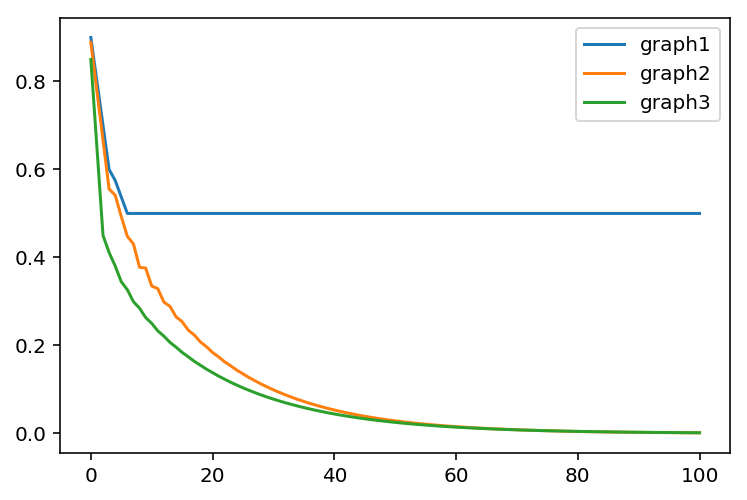

In [4]:
DT = np.zeros((101,3))

for t in range(101):
    DT[t][0] = GetTV(D1, PI1)
    DT[t][1] = GetTV(D2, PI2)
    DT[t][2] = GetTV(D3, PI3)
    D1 = D1 @ P1
    D2 = D2 @ P2
    D3 = D3 @ P3
    
T = np.arange(0,101)

plt.plot(T,DT[:,0])
plt.plot(T,DT[:,1])
plt.plot(T,DT[:,2])
plt.legend(['graph1', 'graph2', 'graph3'])
plt.show();

(c)

 Report the values of $\lambda_2$, the second largest eigenvalue (without taking the absolute value)
of the transition matrix, for each Markov chain

In [5]:
U1,S1,VT1 = np.linalg.svd(P1)
U2,S2,VT2 = np.linalg.svd(P2)
U3,S3,VT3 = np.linalg.svd(P3)
print('the second largest eigenvalue of the trainsition matrix')
print('graph1 = %6f'%S1[1]**2)
print('graph2 = %6f'%S2[1]**2)
print('graph3 = %6f'%S3[1]**2)

the second largest eigenvalue of the trainsition matrix
graph1 = 1.000000
graph2 = 0.883022
graph3 = 0.939282


(d)

 Discuss the results of parts (b) and (c), and their connections. You should specifically
mention the mixing time and the power iteration algorithm. You might also want to explore additional
graphs (e.g., add more edges or use graphs with more nodes) to investigate the relation between the
mixing time and the second largest eigenvalue.


<font color='blue'>
From (b), we can find that DV of graph2 and graph3 converge to zero while DV of graph1 converges to $0.5$. From (c), we can find that the second largest eigenvalue of graph1 is one.

In [6]:
print('ratio of the second largest eigenvalue to the largest eigenvalue')
print('graph2 = %6f'% (S2[0]**2 / S2[1]**2))
print('graph3 = %6f'% (S3[0]**2 / S3[1]**2))

ratio of the second largest eigenvalue to the largest eigenvalue
graph2 = 1.132474
graph3 = 1.141281


<font color='blue'>
    Mathematically, the "time until we are close to $\pi$" is known as the mixing time of the chain, and is defined as the minimum time $t$ s.t. no matther where we start(i.e. for all states $s$), the distance between $D(t,s)$ and $\pi$ is at most $\frac{1}{4}$. From the ratio result above, we can find that the larger ratio of eigenvalue, the faster convergence speed the graph has. This link mixing time with power iteration algorithm since the ratio value $\frac{\lambda_{1}}{\lambda_{2}}$ determins the requisite iteration number to find the first eigenvalue(when initial vector is chosen randomly). Although the initial state $v$ is not chosen randomly, it illusrates that in most setting, the ratio between the two largest eigenvalues of a transition matrix roughly correspond to the rate at which $vP^T$ converges to $\pi$

# Part 2

In [7]:
reading = np.loadtxt("parks.csv", dtype=np.str, delimiter=",")[1:]
parks_name = reading[:,0]
parks_loc = np.zeros(reading[:,1:].shape)
parks_len = len(parks_loc)
for i in range(len(reading)):
    parks_loc[i][0] = float(reading[i][1])
    parks_loc[i][1] = float(reading[i][2])
print(parks_name.shape, parks_loc.shape, parks_len)

def distance(indexes):
    indexes_ = np.append(indexes, indexes[0])
    return np.sum(np.sqrt(np.sum((parks_loc[indexes_[:-1]] - parks_loc[indexes_[1:]])**2, axis=1)))

def route_update(route):
    swap_pos = np.random.randint(parks_len)
    route_new = np.copy(route)
    tmp = route_new[swap_pos]
    route_new[swap_pos] = route_new[(swap_pos+1)%parks_len]
    route_new[(swap_pos+1)%parks_len] = tmp
    return route_new

def route_init():
    route = np.arange(parks_len)
    np.random.shuffle(route)
    return route

distance(np.arange(parks_len))

(30,) (30, 2) 30


491.91817144615464

(a)

Implement the MCMC algorithm. How many states are in this Markov chain? If MAXITER tends to infinity, will you eventually see all possible routes? [Hint: consider separately the cases of $T = 0$ and $T > 0$.]

In [8]:
def MCMC(MAXITER, T, init=route_init, update=route_update, cost=distance):
    route = init()
    best = np.copy(route)
    d_b = cost(best)    
#     print(best, d_b)

    distance_list = np.zeros(MAXITER)

    
    for i in range(1, MAXITER+1):
        route_new = update(route)
        d_n = cost(route_new)
        d_o = cost(route)
        distance_list[i-1] = d_n
        delta = d_n - d_o
        if delta < 0 or (T>0 and np.random.rand() < np.exp(-delta/T)):
            route = route_new
            if d_n < d_b:
                best = route
                d_b = d_n
            
    return best, cost(best), distance_list
    

print(MCMC(10000, 1))

(array([ 4,  2, 26, 14, 13, 23, 28,  5, 15, 16, 27, 21, 20,  7, 17,  9,  0,
        8, 12, 10, 18, 29,  6,  1, 19, 24,  3, 11, 25, 22]), 363.6840515184136, array([564.58085954, 552.18406662, 556.59466062, ..., 376.55674438,
       375.67927187, 370.45793036]))


<font color='blue'>
    There are $\frac{30!}{30} = 29!$ states in this Markov chain.<br>
    When $T=0$, only when $distance_{new} < distance_{old}$ will renew the route. In this case, distance may not get larger, so even if MAXITER tends to infinity, we can only see the states which $distance < distance_{initialization}$. <br>
    When $T>0$, not only when $distance_{new} < distance_{old}$ will renew the route, but also still have posibility to get larger distance. So when MAXITER tends to infinity, we can probably see all the states. <br>

(b)

Set MAXITER to be $10, 000$. Run the algorithm in four different regimes, with $T ∈
\{0, 1, 10, 100\}$. For each value of $T$, run 10 trials. Produce one figure for each value of $T$. In each
figure, plot a line for each trial: the iteration number against the length of the current value of route
(not the current value of best) during that iteration. (Your solution to this part should have 4 figures,
and each plot should contain 10 lines.) Among the 4 values of $T$, which one seems to work the best?

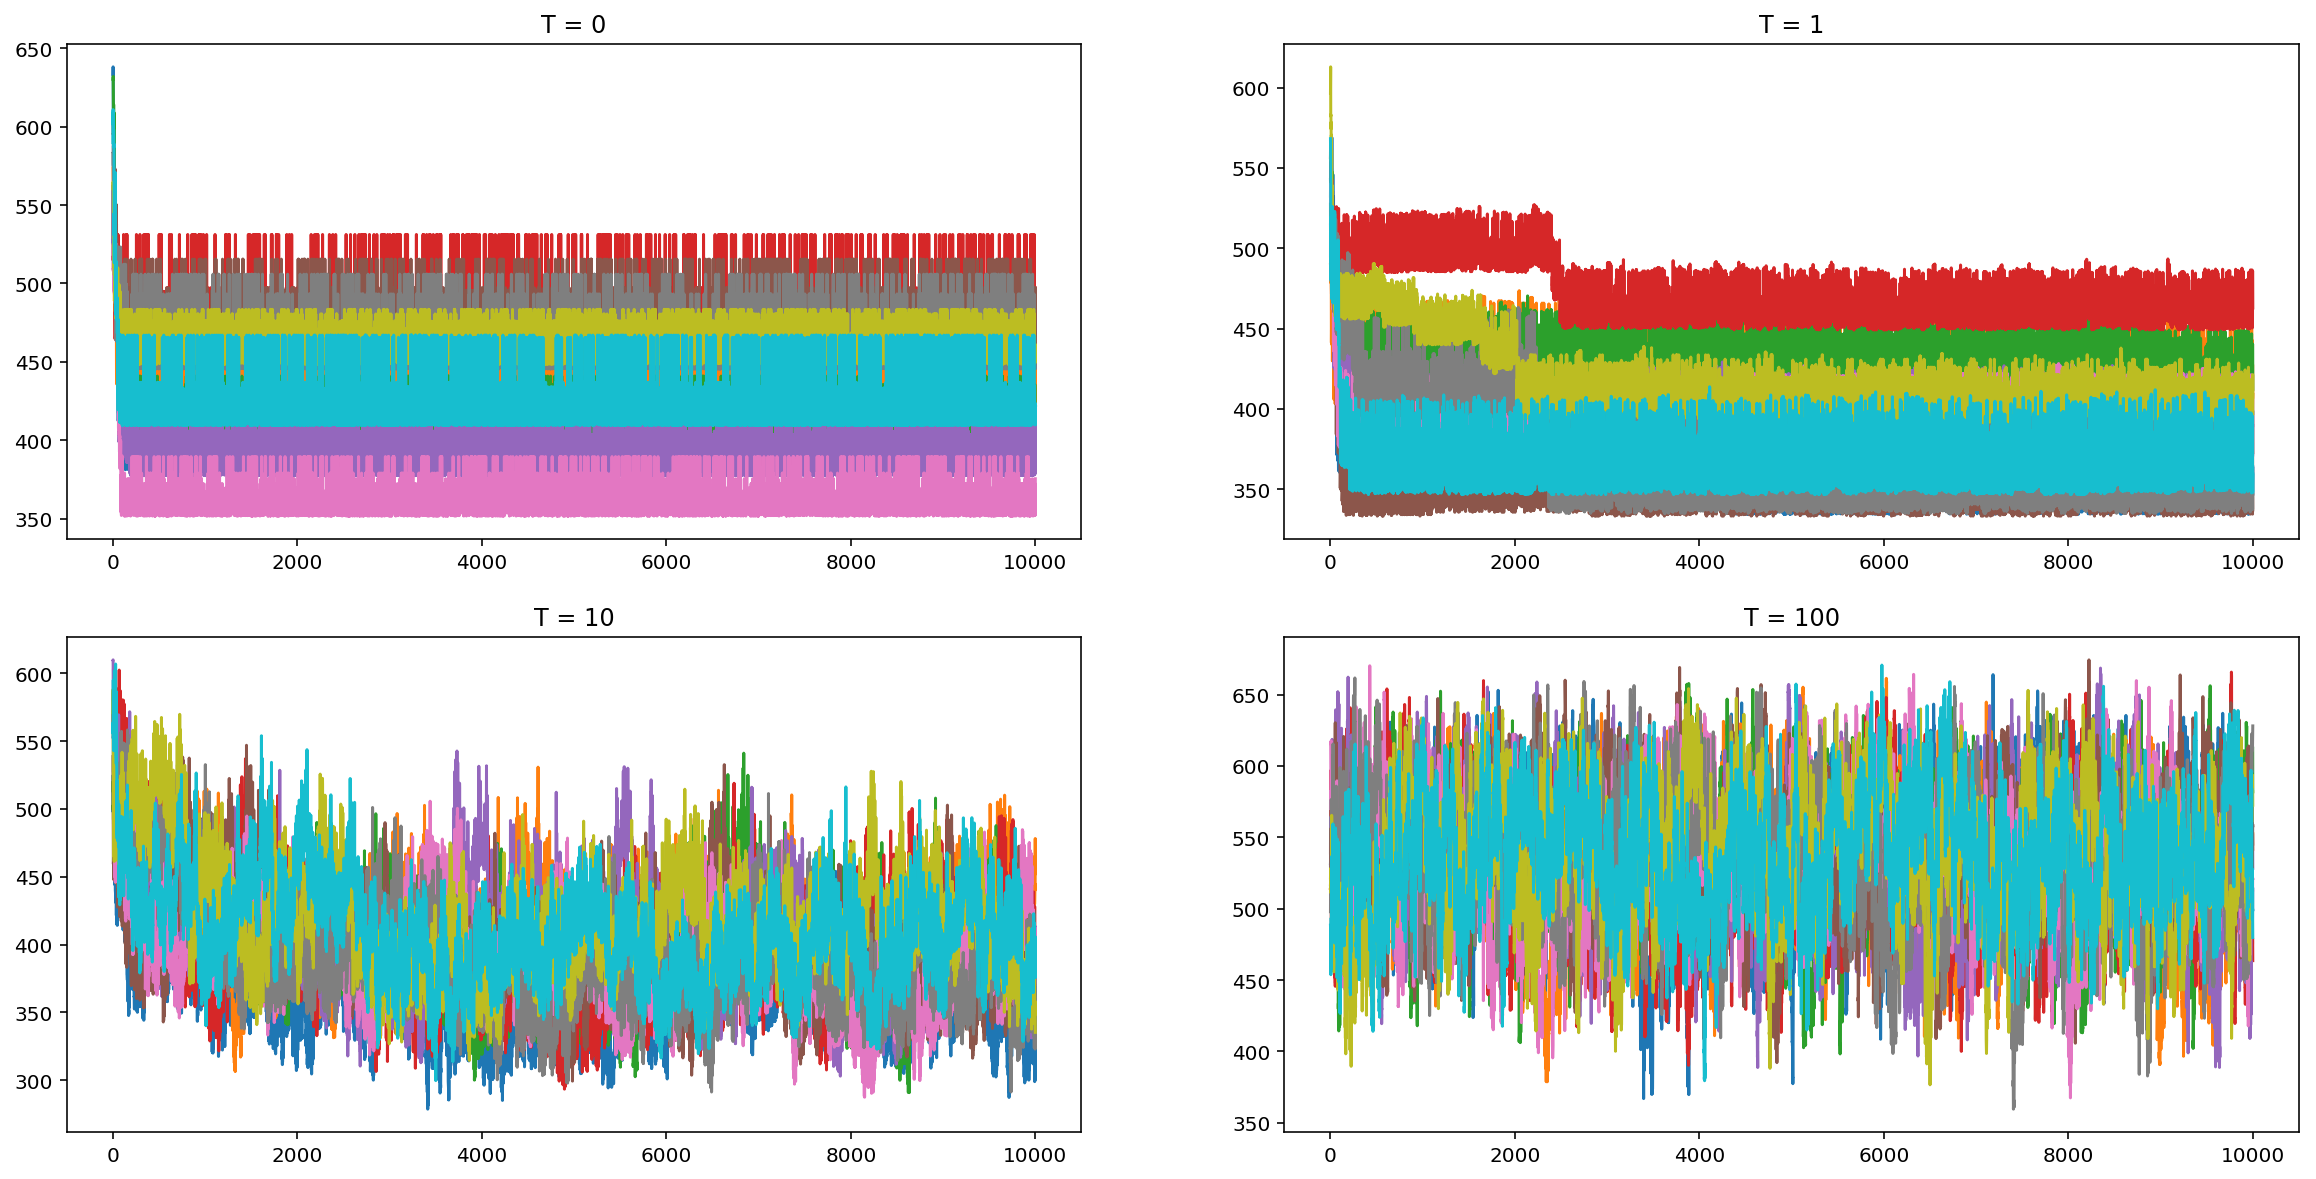

In [9]:
T_lists = [0, 1, 10, 100]
trial_num = 10
MAXITER = 10000

plt.figure(figsize=[20, 10])
distance_list = np.zeros((len(T_lists), trial_num))
smallest_distance = 1000
best_result = None

for i in range(len(T_lists)):
    T = T_lists[i]
    plt.subplot(2, 2, i+1)
    plt.title('T = %d'%(T))
    for _ in range(trial_num):
#         print(i, _)
        path, dis, log = MCMC(MAXITER, T)
        plt.plot(np.arange(MAXITER), log)
        distance_list[i, _] = dis
        if dis < smallest_distance:
            smallest_distance = dis
            best_result = path
        
plt.show();

In [10]:
for i in range(len(T_lists)):
    print("T = %4d, smallest distance = %3.3lf, averange distance = %3.3lf" 
          % (T_lists[i], np.min(distance_list[i,:]), np.average(distance_list[i,:])))

print('The smallest distance is %lf units, the path is: ' % (smallest_distance))
print(best_result)

T =    0, smallest distance = 351.600, averange distance = 414.928
T =    1, smallest distance = 333.185, averange distance = 373.317
T =   10, smallest distance = 278.655, averange distance = 296.472
T =  100, smallest distance = 359.542, averange distance = 379.800
The smallest distance is 278.655409 units, the path is: 
[ 8 16 26  2 24  3 17 28  4 29 11  7 21 22 19 13  6 12 23 25  5 10 20 18
 27  1 15 14  0  9]


<font color='blue'>
    The best T is $T=10$, which get smallest distance as well as smallest average distance.<br>
    The larger T we use, the more instable data will be. Instable data may help to find smaller distance, and help to jump out of local solution. On the other hand, too large T will cause the data not to converge. (i.e. $T=100$).

(c)

Modify the above MCMC algorithm as follows: in each iteration select two parks at random
(not necessarily successive parks) and propose the route obtained by switching them. Repeat the
experiments from part (b). Among the 4 values of T, which one seems to work the best now?

In [11]:
def route_update2(route):
    swap_pos1 = np.random.randint(parks_len)
    swap_pos2 = np.random.randint(parks_len)
    route_new = np.copy(route)
    tmp = route_new[swap_pos1]
    route_new[swap_pos1] = route_new[swap_pos2]
    route_new[swap_pos2] = tmp
    return route_new

print(MCMC(10000, 1, update=route_update2))

(array([ 8, 14,  9, 15,  3, 13,  4, 19,  1,  6,  5, 29, 11, 17, 25, 23, 28,
       18,  7, 20, 22, 21, 10, 27, 12, 24,  2, 26, 16,  0]), 164.13791210608824, array([538.42877535, 538.27644498, 572.46532508, ..., 223.95384607,
       301.69346978, 184.46925247]))


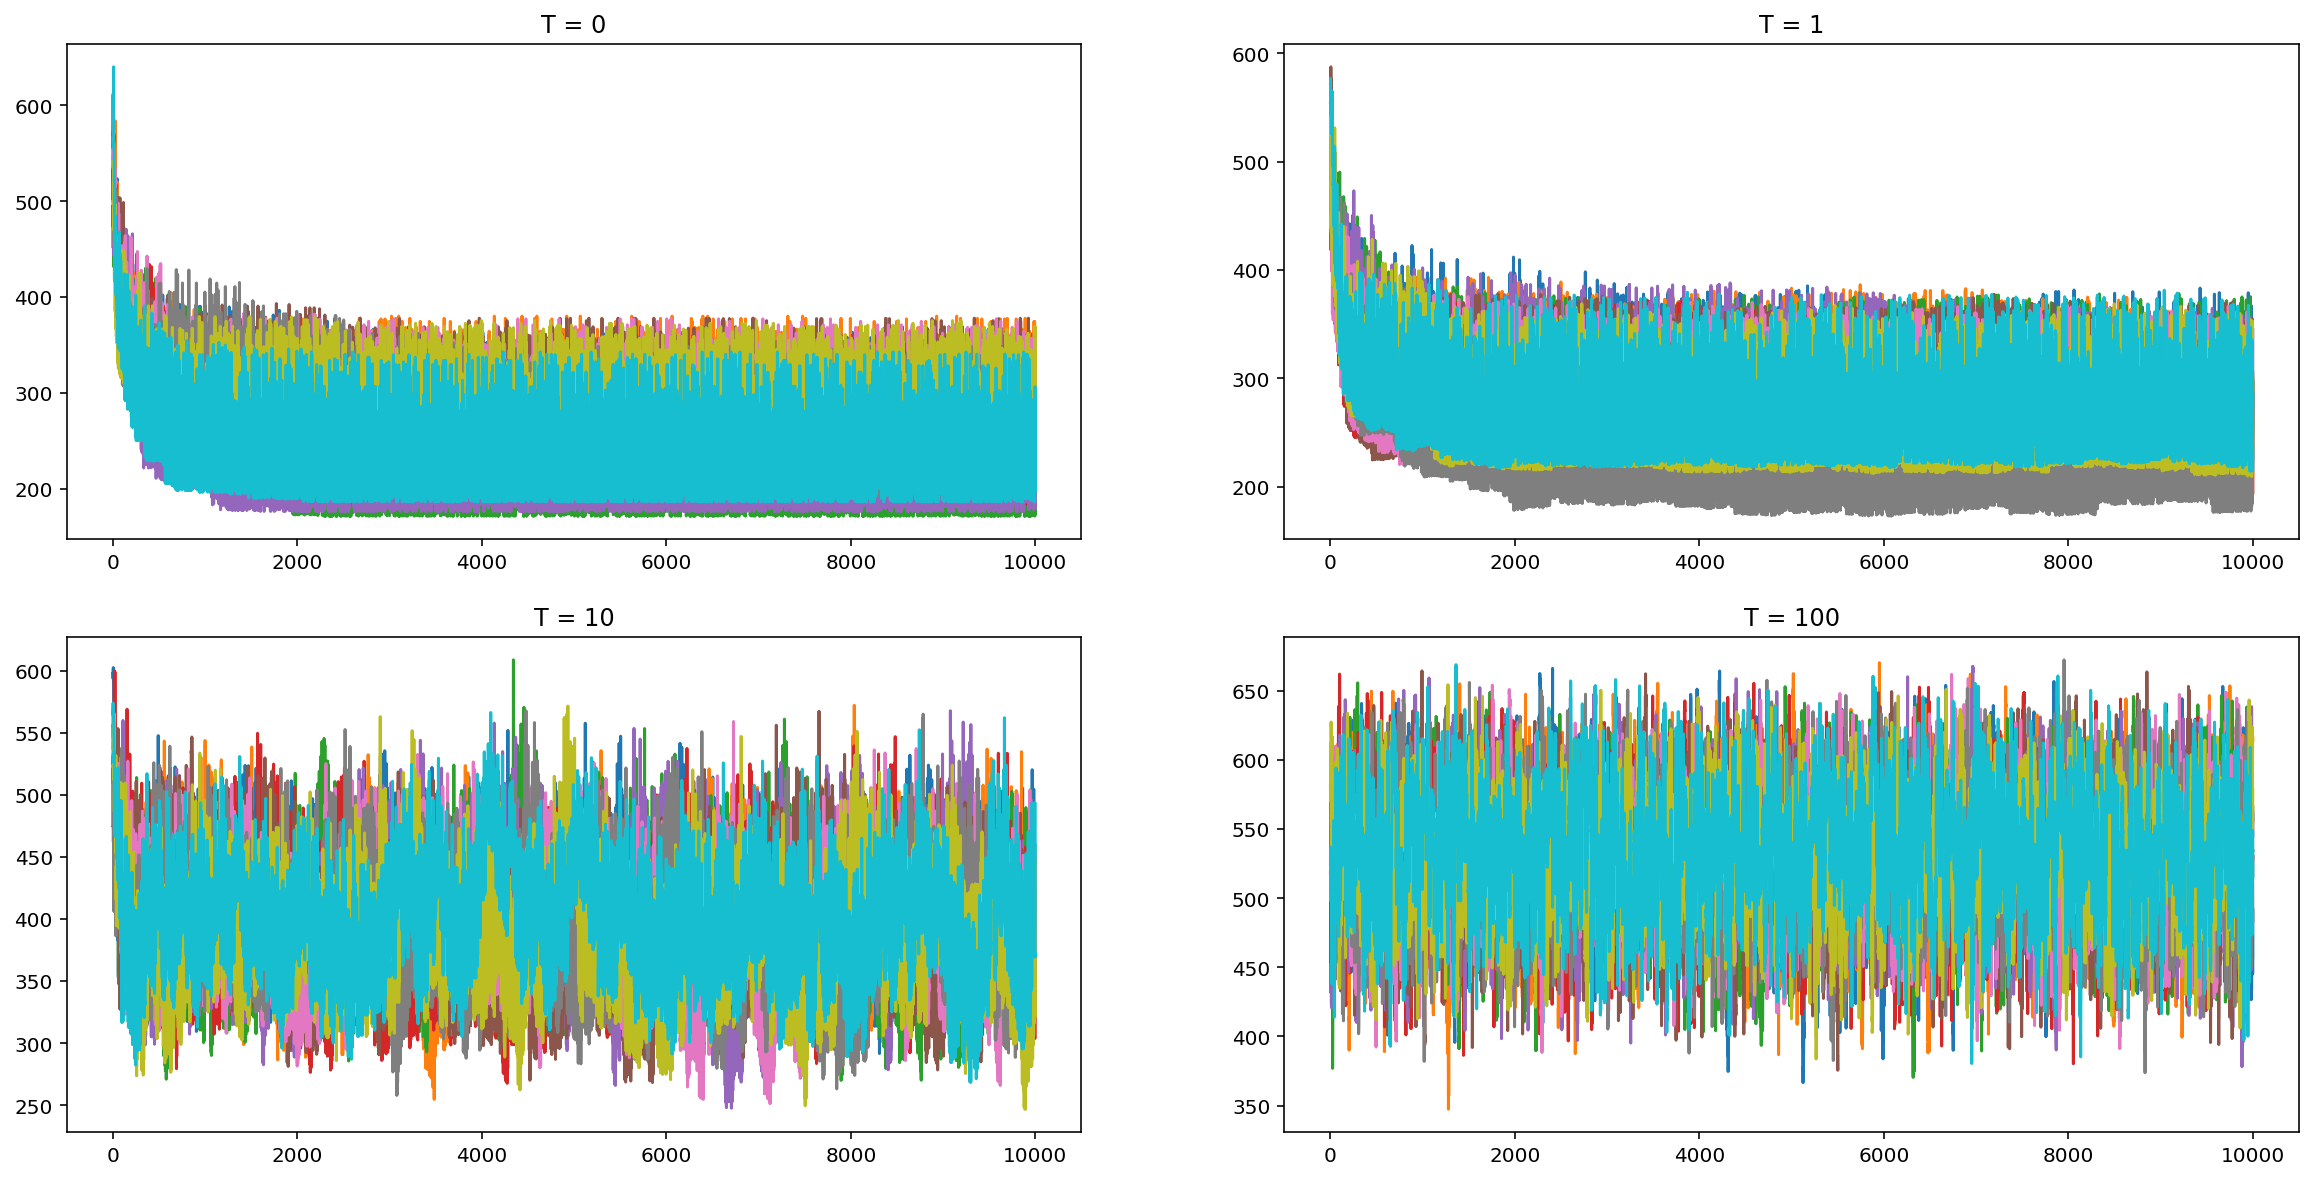

In [12]:
T_lists = [0, 1, 10, 100]
trial_num = 10
MAXITER = 10000

plt.figure(figsize=[20, 10])
distance_list = np.zeros((len(T_lists), trial_num))
smallest_distance = 1000
best_result = None

for i in range(len(T_lists)):
    T = T_lists[i]
    plt.subplot(2, 2, i+1)
    plt.title('T = %d'%(T))
    for _ in range(trial_num):
#         print(i, _)
        path, dis, log = MCMC(MAXITER, T, update=route_update2)
        plt.plot(np.arange(MAXITER), log)
        distance_list[i, _] = dis
        if dis < smallest_distance:
            smallest_distance = dis
            best_result = path
        
plt.show();

In [13]:
for i in range(len(T_lists)):
    print("T = %4d, smallest distance = %3.3lf, averange distance = %3.3lf" 
          % (T_lists[i], np.min(distance_list[i,:]), np.average(distance_list[i,:])))

print('The smallest distance is %lf units, the path is: ' % (smallest_distance))
print(best_result)

T =    0, smallest distance = 171.204, averange distance = 203.330
T =    1, smallest distance = 173.106, averange distance = 203.995
T =   10, smallest distance = 246.722, averange distance = 261.424
T =  100, smallest distance = 347.407, averange distance = 374.438
The smallest distance is 171.204399 units, the path is: 
[28 23 18  7 20 22 21 10 27 12  4 19  1  6  5 29 11 13 24  2 26 16  0  8
 14  9 15  3 17 25]


<font color='blue'>
    The best T is $T=1$, which get smallest distance, and smallest averange distance.

(d)

Describe whatever differences you see relative to part (b), and propose one or more explanations
for why this Markov Chain performs differently from the previous one. If the optimal values
of T are different in the two parts, provide an explanation. (You may wish to think about this part in
the context of the investigation of the mixing times of the different Markov chains in the first problem
of this mini-project.)


<font color='blue'>
    Differences:<br>
    (1) In part(c), we get shorter distance than that in part(b).<br>
    (2) We get the optimal of T smaller (1 vs 10). <br>
    (3) In part(c), data descend more smoothly.<br><br>
    Explain:<br>
    In part(b), we can not only swap nodes successively, so each state of the Markov Chain have only $30$ neighbor states (30 swap position). In part (c), we can swap any 2 nodes. As a consequence, each state of the Markov Chain have $30*29=870$ neighbor states. In part 1, we know that the status converge faster. For this reason, part(c)'s plan converge faster, and we can get better solution easier. So we can use stricter condition, smaller T, to get the best solution.

# Part 3

(a)

Make sure you can call either the python sim(plan) function, or the MATLAB
qwop(plan) functions with a plan consisting of 40 floating point numbers in the range [−1, 1]. The
MATLAB and Python implementations come with a visualization of the game, and we highly encourage
you to look at what actually happens. (In the MATLAB implementation, you can suppress the
animation by including an additional argument of “0” in the function call, ie qwop(plan, 0).)


In [14]:
# This code is based on an assignment designed by Paul Valiant.  
# Please do not disseminate this code without his written permission.
#
# This python implementation was written by Okke Schrijvers for CS168



import sys
import math
import numpy as np
import time
from matplotlib import pyplot as plt
from matplotlib import animation
import copy
import random



# plan is an array of 40 floating point numbers
def sim(plan):
    data = []
    for i in range(0, len(plan)):
        if plan[i] > 1:
            plan[i] = 1.0
        elif plan[i] < -1:
            plan[i] = -1.0

    dt = 0.1
    friction = 1.0
    gravity = 0.1
    mass = [30, 10, 5, 10, 5, 10]
    edgel = [0.5, 0.5, 0.5, 0.5, 0.9]
    edgesp = [160.0, 180.0, 160.0, 180.0, 160.0]
    edgef = [8.0, 8.0, 8.0, 8.0, 8.0]
    anglessp = [20.0, 20.0, 10.0, 10.0]
    anglesf = [8.0, 8.0, 4.0, 4.0]
    
    edge = [(0, 1),(1, 2),(0, 3),(3, 4),(0, 5)]
    angles = [(4, 0),(4, 2),(0, 1),(2, 3)]
    
    # vel and pos of the body parts, 0 is hip, 5 is head, others are joints
    v = [[0.0,0.0,0.0,0.0,0.0,0.0], [0.0,0.0,0.0,0.0,0.0,0.0]]
    p = [[0, 0, -.25, .25, .25, .15], [1, .5, 0, .5, 0, 1.9]]
    
    spin = 0.0
    maxspin = 0.0
    lastang = 0.0
    
    for j in range(20):
        for k in range(10):
            lamb = 0.05 + 0.1*k
            t0 = 0.5
            if j>0:
                t0 = plan[2*j-2]
            t0 *= (1-lamb)
            t0 += plan[2*j]*lamb
            
            t1 = 0.0
            if j>0:
                t1 = plan[2*j-1]
            t1 *= (1-lamb)
            t1 += plan[2*j+1]*lamb
            
            

            contact = [False,False,False,False,False,False]
            for z in range(6):
                if p[1][z] <= 0:
                    contact[z] = True
                    spin = 0
                    p[1][z] = 0

            anglesl = [-(2.8+t0), -(2.8-t0), -(1-t1)*.9, -(1+t1)*.9]

            disp = [[0,0,0,0,0],[0,0,0,0,0]]
            dist = [0,0,0,0,0]
            dispn = [[0,0,0,0,0],[0,0,0,0,0]]
            for z in range(5):
                disp[0][z] = p[0][edge[z][1]]-p[0][edge[z][0]]
                disp[1][z] = p[1][edge[z][1]]-p[1][edge[z][0]]
                dist[z] = math.sqrt(disp[0][z]*disp[0][z] + disp[1][z]*disp[1][z])
                inv = 1.0/dist[z];
                dispn[0][z] = disp[0][z]*inv
                dispn[1][z] = disp[1][z]*inv;
        
            dispv = [[0,0,0,0,0],[0,0,0,0,0]]
            distv = [0,0,0,0,0]
            for z in range(5):
                dispv[0][z] = v[0][edge[z][1]] - v[0][edge[z][0]]
                dispv[1][z] = v[1][edge[z][1]] - v[1][edge[z][0]]
                distv[z] = 2*(disp[0][z]*dispv[0][z] + disp[1][z]*dispv[1][z])

            
            forceedge = [[0,0,0,0,0],[0,0,0,0,0]]
            for z in range(5):
                c = (edgel[z]-dist[z])*edgesp[z]-distv[z]*edgef[z]
                forceedge[0][z] = c*dispn[0][z]
                forceedge[1][z] = c*dispn[1][z]

            edgeang = [0,0,0,0,0]
            edgeangv = [0,0,0,0,0]
            for z in range(5):
                edgeang[z] = math.atan2(disp[1][z], disp[0][z])
                edgeangv[z] = (dispv[0][z]*disp[1][z]-dispv[1][z]*disp[0][z])/(dist[z]*dist[z])

            inc = edgeang[4] - lastang
            if (inc < -math.pi):
                inc += 2.0 * math.pi
            elif inc > math.pi:
                inc -= 2.0 * math.pi
            spin += inc
            spinc = spin - .005*(k + 10 * j)
            if spinc > maxspin:
                maxspin = spinc
                lastang = edgeang[4]

            angv = [0,0,0,0]
            for z in range(4):
                angv[z] = edgeangv[angles[z][1]]-edgeangv[angles[z][0]];

            angf = [0,0,0,0]
            for z in range(4):
                ang = edgeang[angles[z][1]]-edgeang[angles[z][0]]-anglesl[z]
                if ang > math.pi:
                    ang -= 2*math.pi
                elif ang < -math.pi:
                    ang += 2*math.pi
                m0 = dist[angles[z][0]]/edgel[angles[z][0]]
                m1 = dist[angles[z][1]]/edgel[angles[z][1]]
                angf[z] = ang*anglessp[z]-angv[z]*anglesf[z]*min(m0,m1)

            edgetorque = [[0,0,0,0,0],[0,0,0,0,0]]
            for z in range(5):
                inv = 1.0 / (dist[z]*dist[z])
                edgetorque[0][z] = -disp[1][z]*inv
                edgetorque[1][z] =  disp[0][z]*inv

            for z in range(4):
                i0 = angles[z][0]
                i1 = angles[z][1]
                forceedge[0][i0] += angf[z]*edgetorque[0][i0]
                forceedge[1][i0] += angf[z]*edgetorque[1][i0]
                forceedge[0][i1] -= angf[z]*edgetorque[0][i1]
                forceedge[1][i1] -= angf[z]*edgetorque[1][i1]

            f = [[0,0,0,0,0,0],[0,0,0,0,0,0]]
            for z in range(5):
                i0 = edge[z][0]
                i1 = edge[z][1]
                f[0][i0] -= forceedge[0][z]
                f[1][i0] -= forceedge[1][z]
                f[0][i1] += forceedge[0][z]
                f[1][i1] += forceedge[1][z]

            for z in range(6):
                f[1][z] -= gravity*mass[z]
                invm = 1.0/mass[z]
                v[0][z] += f[0][z]*dt*invm
                v[1][z] += f[1][z]*dt*invm
                
                if contact[z]:
                    fric = 0.0
                    if v[1][z] < 0.0:
                        fric = -v[1][z]
                        v[1][z] = 0.0

                    s = np.sign(v[0][z])
                    if v[0][z]*s < fric*friction:
                        v[0][z]=0
                    else:
                        v[0][z] -= fric*friction*s
                p[0][z] += v[0][z] * dt
                p[1][z] += v[1][z] * dt;

            data.append(copy.deepcopy(p))


            if contact[0] or contact[5]:
                return p[0][5], data
            
    return p[0][5], data


###########
# The following code is given as an example to store a video of the run and to display
# the run in a graphics window. You will treat sim(plan) as a black box objective
# function and maximize it.
###########



def draw_animate(plan):
    dis, data = sim(plan)
    print(dis,'m')
    # draw the simulation
    fig = plt.figure()
    fig.set_dpi(100)
    fig.set_size_inches(12, 3)

    ax = plt.axes(xlim=(-1, 10), ylim=(0, 3))

    joints = [5, 0, 1, 2, 1, 0, 3, 4]
    patch = plt.Polygon([[0,0],[0,0]],closed=None, fill=None, edgecolor='k')
    head = plt.Circle((0, 0), radius=0.15, fc='k', ec='k')

    def init():
        ax.add_patch(patch)
        ax.add_patch(head)
        return patch,head


    def animate(j):
    #     print([[data[j][0][i], data[j][1][i]] for i in joints])
        points = np.array([[data[j][0][i], data[j][1][i]] for i in joints])
    #     print(len(points))
        patch.set_xy(points)
        head.center = (data[j][0][5], data[j][1][5])
        return patch,head

    print(len(data))

    anim = animation.FuncAnimation(fig, animate,
                                   init_func=init,
                                   frames=len(data),
                                   interval=20)
    anim.save('animation.mp4', fps=50)

    plt.show()

    print("Finish")

-0.5156071922787178 m
68


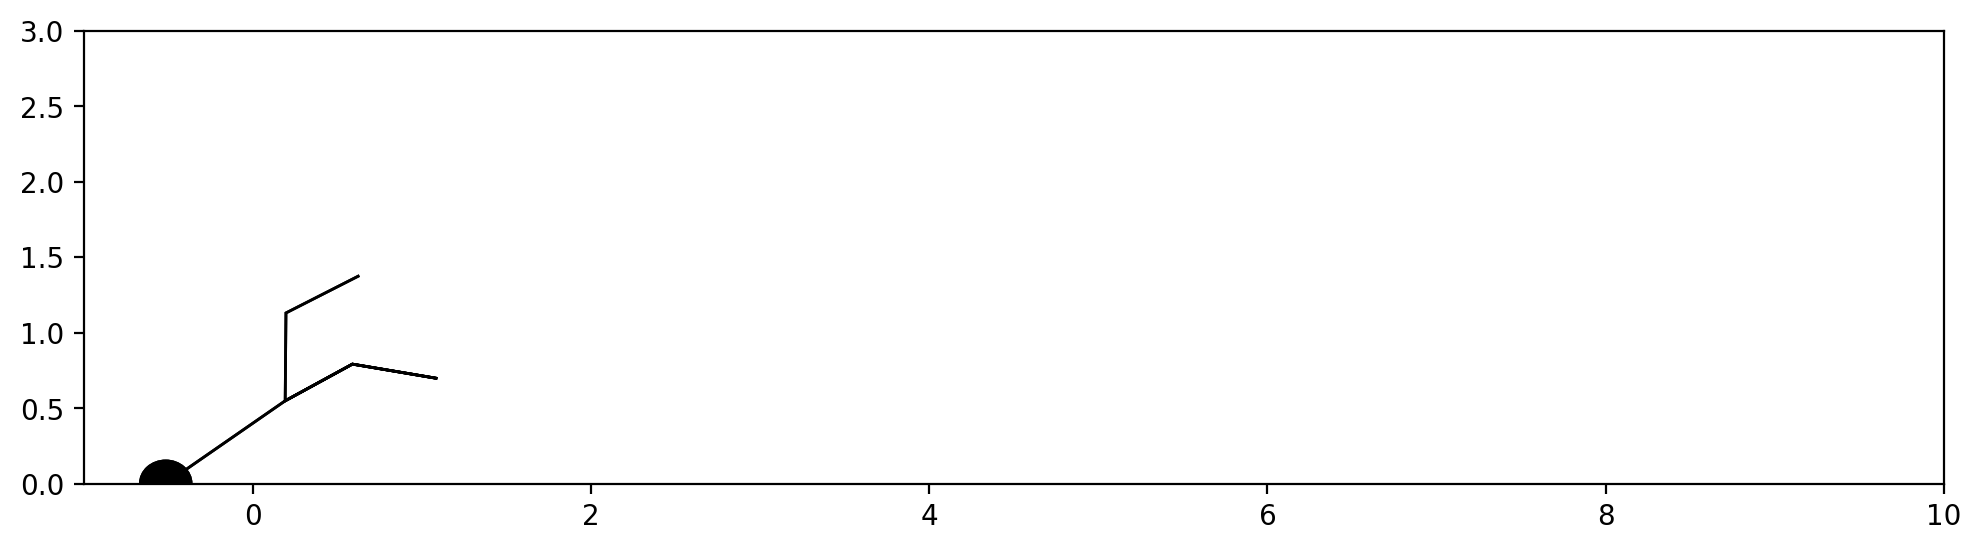

Finish


In [15]:
plan = np.random.uniform(-1, 1, size=(40,))
draw_animate(plan)

(b)

Optimize QWOP. Let $d$ be the distance you get your avatar to go. The number of points
you receive will be $\frac{d^2}{5}$ with anything above 20 points regarded as bonus. There will be a small prize
for the person/group that gets the furthest, and for the group with the most amusing result. [Upload
a video of your final run to YouTube—see the “Deliverables” section below.]

Note: Please do NOT use optimization code that you found online. Design your own MCMCs, variants
of gradient descent, etc.

In [51]:
QWOP_len = 40
def QWOP_init():
    return  np.load('best.npy')

def QWOP_update(plan, hot = True):
    plan_new = np.copy(plan)
    if hot:
        step = np.random.uniform(-0.5, 0.5, size = (40,))
    else:
        step = np.random.uniform(-0.1, 0.1, size = (40,))
    plan_new = plan_new + step
    plan_new[plan_new > 1] = 1
    plan_new[plan_new < -1] = -1
    return plan_new

def QWOP_cost(plan):
    return -sim(plan)[0]

In [56]:
def MCMC2(T, init=route_init, update=route_update, cost=distance):
    best = init()
    route = np.copy(best)
    d_b = cost(best)    

    count = 0
    
    while -cost(best) < 10:
        if T > 1e-4:
            T = 0.999 * T
            route_new = update(route, True)
        else:
            route_new = update(route, False)
            
        d_n = cost(route_new)
        d_r = cost(route)
        delta = d_n - d_r
        if delta < 0 or (T>0 and np.random.rand() < np.exp(-delta/T)):
            route = route_new
            if d_n < d_b:
                best = route
                d_b = d_n
                
        count += 1
        if count % 1000 == 0:
            print('count = %d  distance = %6f m' %(count, -cost(best)),'   T = %6f' % (np.exp(-0.01/T)))
        if count % 10000 == 0:
            np.save('best.npy', best)
        break
    return best, cost(best)


In [57]:
plan, c = MCMC2(1, init=QWOP_init, update=QWOP_update, cost=QWOP_cost)
print(-c, 'm\n')

9.332117533257234 m



9.332117533257234 m
200


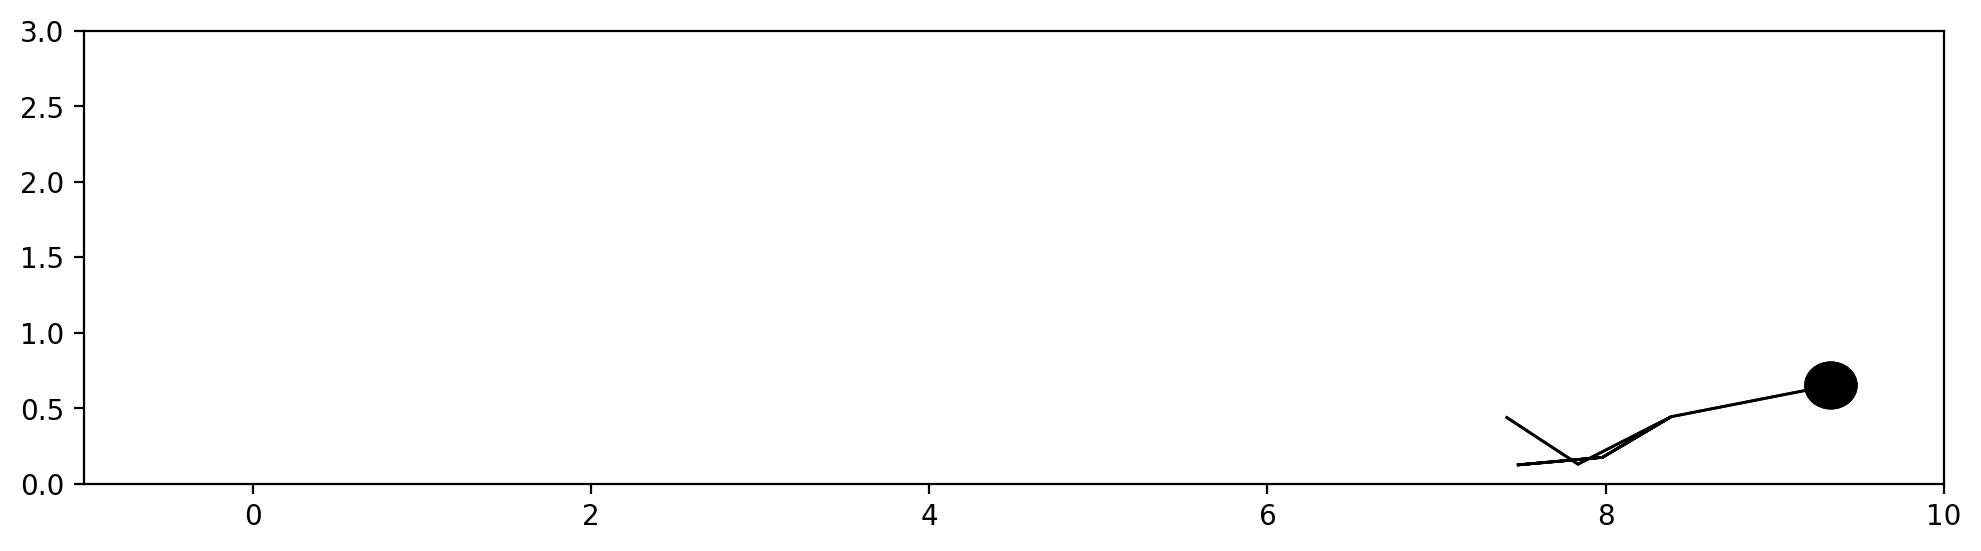

Finish


In [58]:
plan = np.load('best.npy')
draw_animate(plan)

(c)

Describe which techniques you tried, and whether or not they were successful. Also report
the best distance you get.

<font color='blue'>
At first, we initialize the sequence randomly. Then we steps into hot stage where the step size is likely to be large(i.e. step size from [-0.5,0.5]). The temperature decreases as the training step increase. After several steps, the temperature is small enough and jump into cold stage where the step size is probably small(i.e. step size from [0.1,0.1]). Since we want the initialize step to be good enough, we apply hot restart mechanism which means we will restart the algorithm if the distance is less then 7 m in step 10000. Since this algorithm is time consuming, we save the best result for each 10000 step. And we will initialize the sequence with the best result we have get the second time. We also wanna to try gradient descent strategy. However, this function is a black box which means we could not find the derivative. The third idea is to use partial update strategy where we first randomly select one element of the sequence, then we update the corresponding value and get the new distance. However, this strategy has a weakness that if the descending direction does not include the orthogonal direction, we could hardly to get a better result. Using the first method, our best distance is 9.332117533257234 m . 